In [2]:
#pip install seaborn
#!pip install scipy

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import seaborn as sns

from scipy.stats import linregress
import scipy.stats as stats
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
cars_df= pd.read_csv("CO2 Emissions_Canada.csv")
cars_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
cars_df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
numerics_df=cars_df[["Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)","Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]]
numerics_df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [8]:
cars_corr = numerics_df.corr()
#cars_corr.unstack().sort_values()
cars_corr

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


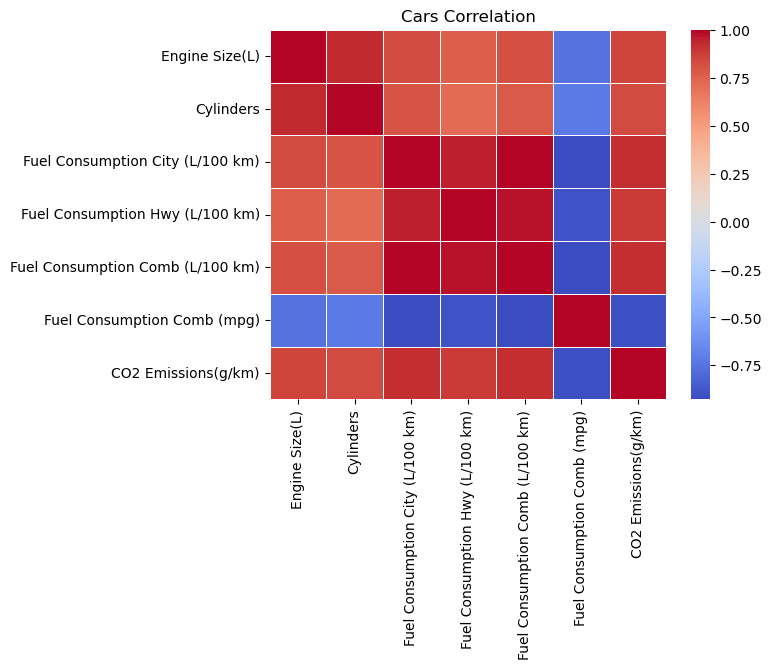

In [9]:
import matplotlib.pylab as plt

ax=sns.heatmap(cars_corr,linewidth=0.5 , cmap="coolwarm")
plt.title("Cars Correlation")
plt.show()


C:\Users\Trade Bridge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)'>

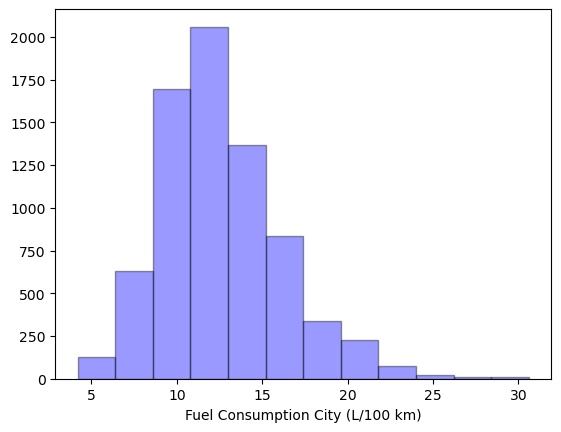

In [10]:
#Checking the normal distribution
sns.distplot(numerics_df["Fuel Consumption City (L/100 km)"], hist=True, kde=False, 
             bins=int(180/15), color = 'blue',
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='Fuel Consumption Hwy (L/100 km)'>

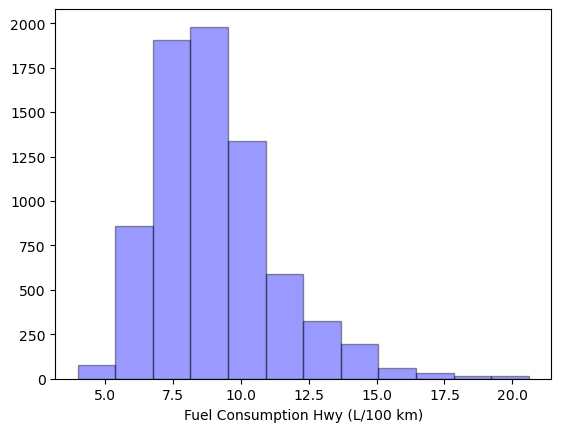

In [11]:
sns.distplot(numerics_df["Fuel Consumption Hwy (L/100 km)"], hist=True, kde=False, 
             bins=int(180/15), color = 'blue',
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='CO2 Emissions(g/km)'>

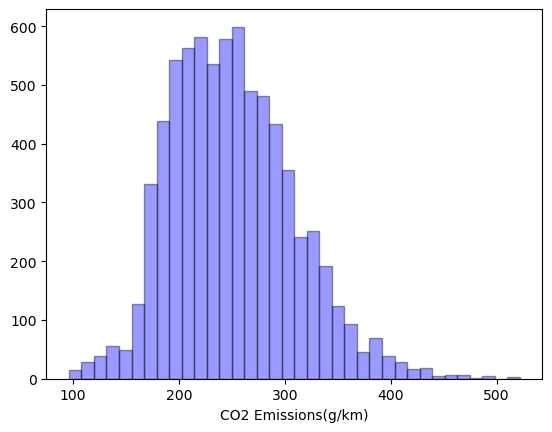

In [12]:
sns.distplot(numerics_df["CO2 Emissions(g/km)"], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})


# Multiple Linear Regression 

In [13]:
#Split the data into X and y
y= numerics_df["CO2 Emissions(g/km)"]

# Separate the X variable, the features
X=numerics_df.drop(columns=["CO2 Emissions(g/km)","Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)"])
X.shape, y.shape

((7385, 4), (7385,))

In [14]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 1)
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((5908,), (1477,), (5908, 4), (1477, 4))

In [15]:
#Create a Linear Regression model
regr = linear_model.LinearRegression()
#Train the model on the training set
regr_model=regr.fit(X_train, y_train)

In [16]:
#Predict on the testing set
y_prediction = regr_model.predict(X_test)
y_prediction.shape

(1477,)

In [17]:
#Evaulate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 score: 0.8797165993674141
Mean Squared Error: 409.5475270722951
Mean Absolute Error: 13.499776395662566


TypeError: 'str' object is not callable

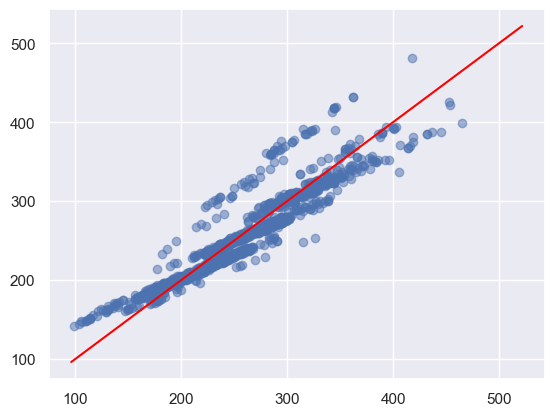

In [204]:
#plot the predicted vs actual values

import matplotlib.pyplot as plt

plt.scatter(y_test, y_prediction, alpha= 0.5 )
plt.plot([y.min(),y.max()], [y.min(),y.max()], color = "red") 
#plt.xlabel("actual values")
#plt.ylabel("predicted values")
#plt.title("predicted vs actual")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'Show'

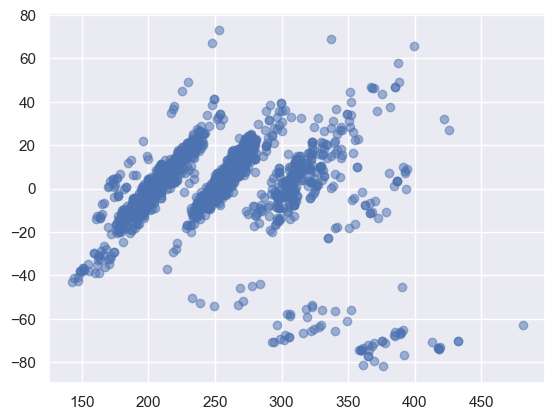

In [205]:
#plot the residuals
plt.scatter(y_prediction, y_test-y_prediction, alpha= 0.5 )
plt.Show()

In [206]:
#Print regression coefficients ans intercept
print("Coefficients: ",  regr.coef_)
print("Intercept:", regr.intercept_)

Coefficients:  [5.75078492 6.65332716 6.8317655  6.48691586]
Intercept: 50.52369559592012


In [207]:
#predict the CO2 emission of a car; 
#where the Engine Size(L): 2.4,Cylinders: 4 ,Fuel Consumption City (L/100 km):11.2, Fuel Consumption Hwy (L/100 km): 7.7
predictedCO2 = regr_model.predict([[2.4, 4, 11.2, 7.7]])
print(predictedCO2)

[217.40391376]


C:\Users\Trade Bridge\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [208]:
#predict the CO2 emission of a car; 
#where the Engine Size(L): 3.5, Cylinders: 6 ,Fuel Consumption City (L/100 km):12.7, Fuel Consumption Hwy (L/100 km): 9.1
predictedCO2 = regr_model.predict([[3.5, 6, 12.7, 9.1]])
print(predictedCO2)

[256.36576195]


C:\Users\Trade Bridge\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [209]:
predictedCO2 = regr_model.predict([[1.5, 4, 6, 5.8]])
print(predictedCO2)

[164.3778866]


C:\Users\Trade Bridge\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Logistics Regression

In [137]:
cars_df.loc[cars_df["CO2 Emissions(g/km)"] <= 255, "CO2"] = 'True' 
cars_df.loc[cars_df["CO2 Emissions(g/km)"] > 255, "CO2"] = 'False' 
cars_df
print(cars_df["CO2"].value_counts())

CO2
True     4182
False    3203
Name: count, dtype: int64


In [1]:
# Convert Yes to 1 and No to 0
cars_df['CO2'] = cars_df['CO2'].map({'True': 1, False: 0})
cars_df.head()

NameError: name 'cars_df' is not defined

In [124]:
print(cars_df["Cylinders"].value_counts())

Cylinders
4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: count, dtype: int64


In [125]:
print(cars_df["Engine Size(L)"].value_counts())

Engine Size(L)
2.0    1460
3.0     804
3.6     536
3.5     529
2.5     423
2.4     346
1.6     302
5.3     290
1.8     216
1.4     211
5.0     207
1.5     207
4.0     198
6.2     162
4.4     131
5.7     116
3.8     114
3.7     112
2.7      99
6.0      94
3.3      85
4.7      78
3.4      52
5.5      52
4.3      52
2.3      51
5.2      48
6.4      46
5.6      36
3.2      35
4.8      32
4.6      32
6.6      29
1.2      25
6.7      25
2.8      24
2.9      23
1.0      18
6.5      18
4.2      14
1.3      11
5.4       8
6.8       8
2.1       5
8.4       5
5.9       5
6.3       3
0.9       3
8.0       3
5.8       1
2.2       1
Name: count, dtype: int64


In [126]:
print(cars_df["Fuel Consumption Comb (L/100 km)"].value_counts())

Fuel Consumption Comb (L/100 km)
9.4     145
8.4     136
9.8     135
9.1     132
10.3    130
       ... 
21.2      1
6.1       1
23.0      1
22.5      1
4.2       1
Name: count, Length: 181, dtype: int64


In [132]:
print(cars_df["Fuel Consumption Comb (L/100 km)"].value_counts()[cars_df["Fuel Consumption Comb (L/100 km)"].value_counts() > 50])

Fuel Consumption Comb (L/100 km)
9.4     145
8.4     136
9.8     135
9.1     132
10.3    130
       ... 
7.7      63
13.1     57
14.7     53
14.2     52
7.3      51
Name: count, Length: 63, dtype: int64
